**Staement: Having a porch increases home sale price**

**H<sub>0</sub> =Home sale price will decrease of reamin the same if it has a porch.**

**H<sub>A</sub>= Home sale price will increase if the propery has a porch.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 0)
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2
%matplotlib inline

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

# Initial import of 2019 Sales and Residential data to create vizualizations

In [2]:
sales_2019=pd.read_csv('../../data/EXTR_RPSale_2019.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})
PINS=pd.read_csv('../../data/PINS.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})
bldinfo_2019 = pd.read_csv('../../data/EXTR_ResBldg_2019.csv', dtype={'Major': 'str', 'Minor':'str', 'ZipCode': 'str','PIN':'string'})

**Now we need to filter our data on what we perceive to be actual sales.** 
**Exlusions:** Assumptions,Mortgage Assumption, Foreclosure,Trust,Executor-to admin guardian,Testamentary Trust,Estate,Settlement,Settlement, Property Settlement,Divorce Settlement
, Tenancy Partition, Community Prop Established, Partial Int - love,aff,gft,Easement, Correction (refiling),Trade,Quit Claim Deed - gift/full or part interest

In [3]:
actual_sales=sales_2019[(sales_2019["SaleReason"]==1)|(sales_2019["SaleReason"]==18)]
actual_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A,STONE AVENUE HOUSE LLC,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M,PEDERSEN MICHAEL J,11,6,15,N,N,N,N,1,8,,3023000320


# Now one more filter to only display residential sale

In [4]:
res_sales=actual_sales[(actual_sales["PropertyClass"]==7)|(actual_sales["PropertyClass"]==8)]
res_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A,STONE AVENUE HOUSE LLC,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M,PEDERSEN MICHAEL J,11,6,15,N,N,N,N,1,8,,3023000320


# Lastly, we need to filter out the zeros in the Sales column. 

In [5]:
finalsales=res_sales[res_sales["SalePrice"]!=0]
finalsales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505


# Next we will filter out our outlier based on Z scores. 

In [6]:
z_score=np.abs(stats.zscore(finalsales["SalePrice"]))
siftedsales=finalsales[z_score <3]
siftedsales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505


# Now we have our sifted our sales data we now need to create our porch data

In [7]:
has_porch= bldinfo_2019[(bldinfo_2019["SqFtOpenPorch"]!=0)|(bldinfo_2019["SqFtEnclosedPorch"]!=0)]
has_porch

,Unnamed: 0,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PIN
0,16,010050,0380,1,1,2435 S 354TH ST 98003,2435,,S,354TH,ST,,98003,1.0,7,0,1480,0,0,0,0,0,1480,0,0,0,0,440,,80,0,120,5,2,0,,3,0,0,2,1,0,0,0,1994,0,0,0,0,5,0,0100500380
4,38,018880,0210,1,1,3410 SE 18TH ST,3410,,SE,18TH,ST,,NaN,2.0,9,0,1602,0,1991,0,0,0,3593,0,0,0,0,520,N,204,0,0,5,2,0,N,4,1,0,4,1,0,0,1,2019,0,49,0,0,3,0,0188800210
5,41,019110,0145,1,1,4512 90TH AVE SE 98040,4512,,,90TH,AVE,SE,98040,1.0,8,0,2290,0,0,0,0,0,2290,0,0,0,0,0,,250,0,0,6,2,95,,3,1,1,1,1,0,0,0,1950,0,0,0,0,4,0,0191100145
7,54,017900,1770,1,1,12207 50TH AVE S 98168,12207,,,50TH,AVE,S,98168,1.0,8,0,1350,0,0,0,0,0,2230,1280,880,7,400,80,Y,40,0,100,5,3,0,,3,0,0,2,1,0,0,0,2015,0,0,0,0,3,0,0179001770
9,82,017900,2305,1,1,12517 51ST PL S,12517,,,51ST,PL,S,NaN,1.0,8,0,2190,0,0,0,0,0,2190,0,0,0,0,760,N,140,0,0,5,2,0,N,4,1,0,2,0,0,0,0,2015,0,0,0,0,3,0,0179002305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37930,514925,430735,1100,1,1,3103 SE 4TH ST 98056,3103,,SE,4TH,ST,,98056,2.0,7,0,1630,0,2250,0,0,0,3880,0,0,0,0,610,N,340,0,0,5,2,0,N,5,0,0,3,1,0,0,0,2004,0,0,0,0,3,3500,4307351100
37931,514934,431070,0295,1,1,9721 WALLINGFORD AVE N 98103,9721,,,WALLINGFORD,AVE,N,98103,1.0,7,0,890,0,0,0,0,0,990,890,100,6,240,0,N,40,0,0,5,1,0,N,3,0,0,1,0,0,1,0,1908,0,0,0,0,3,0,4310700295
37942,515014,873218,0020,1,1,32602 47TH AVE SW 98023,32602,,,47TH,AVE,SW,98023,1.0,8,0,1290,0,0,0,0,0,1910,620,620,8,0,0,Y,70,0,100,5,2,0,N,3,1,1,1,0,0,0,0,1985,0,0,0,0,4,0,8732180020
37944,515045,880590,0420,1,1,2026 E LOUISA ST 98112,2026,,E,LOUISA,ST,,98112,1.5,8,0,1090,800,0,0,0,0,2390,1090,500,6,180,0,N,40,0,350,5,2,0,N,4,0,0,2,0,1,0,0,1927,0,0,0,0,3,0,8805900420


# Now we create a porch column that includes values from both the closed and enclosed porch columns.

In [8]:
has_porch["porch"]=(has_porch["SqFtOpenPorch"]+ has_porch["SqFtEnclosedPorch"])

<ipython-input-8-d5a44313ee20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_porch["porch"]=(has_porch["SqFtOpenPorch"]+ has_porch["SqFtEnclosedPorch"])


# Display our porch table with new columns and its assigned values.

In [9]:
has_porch

,Unnamed: 0,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PIN,porch
0,16,010050,0380,1,1,2435 S 354TH ST 98003,2435,,S,354TH,ST,,98003,1.0,7,0,1480,0,0,0,0,0,1480,0,0,0,0,440,,80,0,120,5,2,0,,3,0,0,2,1,0,0,0,1994,0,0,0,0,5,0,0100500380,80
4,38,018880,0210,1,1,3410 SE 18TH ST,3410,,SE,18TH,ST,,NaN,2.0,9,0,1602,0,1991,0,0,0,3593,0,0,0,0,520,N,204,0,0,5,2,0,N,4,1,0,4,1,0,0,1,2019,0,49,0,0,3,0,0188800210,204
5,41,019110,0145,1,1,4512 90TH AVE SE 98040,4512,,,90TH,AVE,SE,98040,1.0,8,0,2290,0,0,0,0,0,2290,0,0,0,0,0,,250,0,0,6,2,95,,3,1,1,1,1,0,0,0,1950,0,0,0,0,4,0,0191100145,250
7,54,017900,1770,1,1,12207 50TH AVE S 98168,12207,,,50TH,AVE,S,98168,1.0,8,0,1350,0,0,0,0,0,2230,1280,880,7,400,80,Y,40,0,100,5,3,0,,3,0,0,2,1,0,0,0,2015,0,0,0,0,3,0,0179001770,40
9,82,017900,2305,1,1,12517 51ST PL S,12517,,,51ST,PL,S,NaN,1.0,8,0,2190,0,0,0,0,0,2190,0,0,0,0,760,N,140,0,0,5,2,0,N,4,1,0,2,0,0,0,0,2015,0,0,0,0,3,0,0179002305,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37930,514925,430735,1100,1,1,3103 SE 4TH ST 98056,3103,,SE,4TH,ST,,98056,2.0,7,0,1630,0,2250,0,0,0,3880,0,0,0,0,610,N,340,0,0,5,2,0,N,5,0,0,3,1,0,0,0,2004,0,0,0,0,3,3500,4307351100,340
37931,514934,431070,0295,1,1,9721 WALLINGFORD AVE N 98103,9721,,,WALLINGFORD,AVE,N,98103,1.0,7,0,890,0,0,0,0,0,990,890,100,6,240,0,N,40,0,0,5,1,0,N,3,0,0,1,0,0,1,0,1908,0,0,0,0,3,0,4310700295,40
37942,515014,873218,0020,1,1,32602 47TH AVE SW 98023,32602,,,47TH,AVE,SW,98023,1.0,8,0,1290,0,0,0,0,0,1910,620,620,8,0,0,Y,70,0,100,5,2,0,N,3,1,1,1,0,0,0,0,1985,0,0,0,0,4,0,8732180020,70
37944,515045,880590,0420,1,1,2026 E LOUISA ST 98112,2026,,E,LOUISA,ST,,98112,1.5,8,0,1090,800,0,0,0,0,2390,1090,500,6,180,0,N,40,0,350,5,2,0,N,4,0,0,2,0,1,0,0,1927,0,0,0,0,3,0,8805900420,40


# Merge our residential porches data with our now sifted sales data on the unique identifiers known as a PIN.

In [10]:
sales_and_porch=siftedsales.merge(has_porch, how="inner", on="PIN")
sales_and_porch

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN,Unnamed: 0_y,Major_y,Minor_y,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,porch
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120,149390,213043,0120,1,1,27033 NE DOROTHY ST 98019,27033,,NE,DOROTHY,ST,,98019,1.0,7,0,1930,0,0,0,0,0,1930,0,0,0,0,550,,180,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0,180
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630,488069,940652,0630,1,1,22848 SE 264TH CT 98038,22848,,SE,264TH,CT,,98038,2.0,7,0,1057,0,918,0,0,0,1975,0,0,0,0,465,,45,0,0,5,2,0,,3,0,2,1,0,1,0,0,1994,0,0,0,0,3,2500,45
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020,24064,140281,0020,1,1,27001 NE MILLER ST 98019,27001,,NE,MILLER,ST,,98019,1.0,7,0,1080,0,0,0,0,0,1080,0,0,0,0,400,,110,0,80,1,3,0,,3,0,0,2,1,0,0,0,1986,0,0,0,0,3,0,110
3,2016726,3014031,663990,0178,2019-10-04,950000,20191007000828,,,,,,,GAO YUE,SHASHIDHARA ARJUN+ACHALKAR SNEHA,3,6,3,N,N,N,N,1,8,,6639900178,347131,663990,0178,1,1,12310 NE 100TH PL 98033,12310,,NE,100TH,PL,,98033,2.0,8,0,1360,0,910,0,0,0,2270,0,0,0,0,660,,60,0,310,5,2,0,,3,1,0,2,1,1,0,0,1994,0,0,0,0,3,0,60
4,882,3003196,188780,0340,2019-07-23,1445000,20190802001114,,,,,,,MAINVUE WA LLC,PANDEY ASEEM+MAMTA,10,6,3,N,N,N,N,1,8,,1887800340,392737,188780,0340,1,1,3861 223RD AVE SE 98075,3861,,,223RD,AVE,SE,98075,2.0,9,0,2150,0,2770,0,0,0,4920,0,0,0,0,490,,300,0,0,5,2,0,,5,2,1,3,1,0,0,0,2018,0,0,0,0,3,0,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15857,2087639,3000521,200900,1424,2019-07-14,3375000,20190722000385,,,,,,,BELL CAROLYN,MINARDI PAUL M AND CAMILLE G TRUSTEES +PAUL M+ET A,11,6,3,N,N,N,N,1,8,,2009001424,105901,200900,1424,1,1,21827 4TH AVE S,21827,,,4TH,AVE,S,NaN,2.0,12,0,3169,0,3261,0,0,0,6430,0,0,0,0,1480,N,110,0,276,5,2,10,N,5,2,2,2,2,0,0,0,2008,0,0,0,0,3,0,110
15858,2087713,3012427,374670,0090,2019-09-16,1250000,20190927001174,,,,,,,WALIA SANDEEP+EMMA,BRIGHAM JARED JAMES+MEGHAN MAUREEN,11,6,3,N,N,N,N,1,8,,3746700090,155842,374670,0090,1,1,618 SW 185TH ST,618,,SW,185TH,ST,,NaN,2.0,11,0,1916,0,2101,0,0,0,4017,0,0,0,0,1062,N,632,0,0,5,2,5,N,5,0,1,2,3,0,0,0,2015,0,0,0,0,3,0,632
15859,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760,416400,929085,0760,1,1,10316 214TH AVE NE 98052,10316,,,214TH,AVE,NE,98052,1.0,10,0,2880,0,0,0,0,0,2880,0,0,0,0,870,,130,0,470,7,2,0,,4,1,0,2,2,0,0,0,1989,0,0,0,0,3,0,130
15860,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505,332441,615020,0505,1,1,13522 BURKE AVE N 98133,13522,,,BURKE,AVE,N,98133,2.

In [11]:
no_porch= bldinfo_2019[(bldinfo_2019["SqFtOpenPorch"]==0)&(bldinfo_2019["SqFtEnclosedPorch"]==0)]
no_porch

,Unnamed: 0,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PIN
1,27,017900,0315,1,1,12254 43RD AVE S 98178,12254,,,43RD,AVE,S,98178,1.0,5,0,550,0,0,0,0,0,550,0,0,0,0,0,,0,0,0,1,1,0,,2,0,1,0,0,0,0,0,1942,0,0,0,0,3,0,0179000315
2,31,017900,1290,1,1,12231 48TH AVE S 98178,12231,,,48TH,AVE,S,98178,2.0,7,0,660,0,920,0,0,0,1580,0,0,0,0,420,,0,0,0,5,2,0,,3,1,0,2,0,0,0,0,2002,0,0,0,0,3,0,0179001290
3,37,018800,0095,1,1,1602 LAKEVIEW BLVD E 98102,1602,,,LAKEVIEW,BLVD,E,98102,2.0,9,0,660,0,595,0,0,0,1540,380,285,8,0,0,Y,0,0,155,1,3,0,Y,3,1,1,1,0,1,0,0,1984,0,0,0,0,3,0,0188000095
6,42,019110,0310,1,1,4520 88TH AVE SE 98040,4520,,,88TH,AVE,SE,98040,1.0,8,0,1390,0,0,0,0,0,2780,1390,1390,7,0,0,Y,0,0,100,5,2,0,N,6,0,1,1,0,1,0,1,1967,0,0,0,0,3,0,0191100310
8,55,017900,2501,1,1,12566 50TH PL S 98178,12566,,,50TH,PL,S,98178,2.0,8,0,1110,0,1400,0,0,0,2510,0,0,0,0,400,,0,0,0,5,2,0,,4,1,0,2,0,0,0,0,2019,0,70,0,0,3,0,0179002501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37949,515104,195970,1472,1,1,2857 FRANKLIN AVE E,2857,,,FRANKLIN,AVE,E,NaN,2.0,9,0,490,0,510,0,0,0,1510,510,510,9,0,0,N,0,0,0,7,2,0,N,2,0,1,1,0,0,0,0,2016,0,0,0,0,3,0,1959701472
37950,515122,197220,0269,1,1,3616 PALATINE AVE N,3616,,,PALATINE,AVE,N,NaN,2.0,8,0,440,0,440,0,0,0,1270,390,390,8,0,0,Y,0,0,370,7,3,0,,3,1,2,0,1,0,0,0,2017,0,0,0,0,3,5000,1972200269
37951,515138,197220,1902,1,1,3816 WINSLOW PL N 98103,3816,,,WINSLOW,PL,N,98103,3.0,8,0,150,0,450,430,0,0,1030,0,0,0,0,240,,0,0,0,5,2,0,,2,1,0,1,1,0,0,0,2003,0,0,0,0,3,0,1972201902
37952,515144,197220,5172,1,1,11 B W DRAVUS ST,11,B,W,DRAVUS,ST,,NaN,3.0,8,0,220,0,510,380,0,0,1600,490,490,8,0,290,,0,0,0,5,2,0,,3,1,0,2,0,0,0,0,2007,0,0,0,0,3,0,1972205172


# After doing our Prior analysis of our porch data we know there is a correlation between having a porch and not having a porch. Let make a visual looking at the mean price of houses with or without a porch.

In [12]:
sales_and_no_porch=siftedsales.merge(no_porch, how="inner", on="PIN")
sales_and_no_porch

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN,Unnamed: 0_y,Major_y,Minor_y,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098,5810,124550,0098,1,1,9823 FORBES CREEK DR 98033,9823,,,FORBES CREEK,DR,,98033,1.0,7,0,1140,0,0,0,0,0,1760,1030,620,6,410,100,,0,0,220,5,2,0,,3,0,1,1,0,1,0,0,1980,0,0,0,0,3,0
1,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320,377823,797320,2320,1,1,10246 5TH AVE SW 98146,10246,,,5TH,AVE,SW,98146,1.0,6,0,860,0,0,0,0,0,1240,380,380,6,0,0,,0,0,0,5,2,0,,3,1,1,1,1,0,0,0,1930,0,0,0,0,5,0
2,612,2980836,937630,0695,2019-03-28,550000,20190404001008,,,,,,,WOLFE BRUCE A+MEGAN D,ALBRECHT BRYSON+ALBRECHT STEPHEN+KATHERINE BERNDT,3,6,3,N,N,N,N,1,8,,9376300695,486756,937630,0695,1,1,8013 11TH AVE NW 98117,8013,,,11TH,AVE,NW,98117,3.0,8,0,370,0,540,650,0,0,1560,0,0,0,0,240,N,0,0,200,4,3,0,N,2,1,0,1,0,1,0,0,1985,0,0,0,0,3,0
3,625,3006119,327585,0290,2019-08-13,1025000,20190821000972,,,,,,,LI YANG+JIANG NANYAN,WANG ZIRUI+LI XUECHEN,3,6,3,N,N,N,N,1,8,,3275850290,213142,327585,0290,1,1,17619 NE 101ST CT 98052,17619,,NE,101ST,CT,,98052,2.0,9,0,1390,0,1130,0,0,0,2520,0,0,0,0,510,,0,0,800,5,2,0,,4,1,0,2,0,1,0,0,1989,0,0,0,0,4,0
4,1114,2982060,347050,0040,2019-04-04,648500,,,,,,,,BROWN MARK E+MARCIE K,MEDVED ROBERT J+JENNIFER E,11,6,3,N,N,N,N,1,8,,3470500040,296885,347050,0040,1,1,26034 231ST PL SE,26034,,,231ST,PL,SE,NaN,2.0,8,0,1390,0,1910,0,0,0,3300,0,0,0,0,590,,0,0,0,5,2,0,,5,1,0,2,1,0,0,0,2005,0,0,0,0,3,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12725,2087635,3020975,692960,2340,2019-11-14,339000,20191115001539,,,,,,,SMITH STACEY SUZANNE+BRIAN JOSHUA,NGUYEN SON THANH+TRAN DAI CAC THI,11,6,3,N,N,N,N,1,8,,6929602340,290411,692960,2340,1,1,24335 21ST AVE S 98198,24335,,,21ST,AVE,S,98198,1.0,7,0,880,0,0,0,0,0,880,0,0,0,0,440,,0,0,240,4,3,0,,3,0,0,1,1,0,0,0,1978,0,0,0,0,4,0
12726,2087649,3006389,322607,9085,2019-08-20,828130,,,,,,,,CARLSON JOSHUA L+HEATHER M,HADFIELD DUANE J+BETH J,11,6,3,N,N,N,N,1,8,,3226079085,118424,322607,9085,1,1,10525 302ND WAY NE 98014,10525,,,302ND,WAY,NE,98014,1.0,9,0,2340,0,0,0,0,0,2340,2340,0,0,0,0,,0,0,610,5,2,0,,3,1,0,2,1,0,0,0,1989,0,0,0,0,3,0
12727,2087671,2992253,010050,0270,2019-06-03,395000,20190607000102,,,,,,,BURR DAVID EARL,APAS BRYAN MATA+KRESTA JAE MENDOZA,11,6,3,N,N,N,N,1,8,,0100500270,12287,010050,0270,1,1,2416 S 354TH ST 98003,2416,,S,354TH,ST,,98003,1.0,7,0,1460,0,0,0,0,0,1460,0,0,0,0,400,,0,0,0,5,2,0,,3,0,0,2,1,0,0,0,1994,0,0,0,0,4,0
12728,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095,222599,405940,0095,1,1,11234 CORNELL AVE S 98178,11234,,,CORNELL,AVE,S,98178,1.0,6,0,1430,0,0,0,0,0,1430,0,0,0,0,0,,0,0,200,

# First lets calculate our mean sale price of houses with no porch.

In [13]:
sales_and_no_porch["SalePrice"].mean()

668800.3306362922

# Next lets calculate our mean sale price of houses with a porch.

In [14]:
sales_and_porch["SalePrice"].mean()

875205.4612280923

# Lastly lets graphs our means agasint each other.

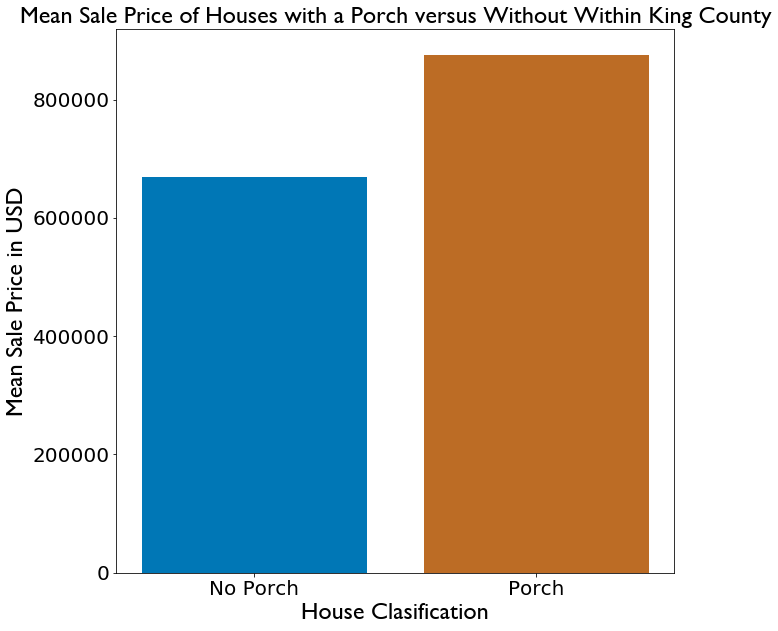

In [150]:
plt.figure(figsize=(10,10))
plt.bar(x=["No Porch","Porch"],height=[668800.3306362922, 875205.461228],color=["#0077b6", "#BC6C25"],);
plt.ylabel('Mean Sale Price in USD', fontsize=24,fontname="Gill Sans MT")
plt.title('Mean Sale Price of Houses with a Porch versus Without Within King County', fontsize=24,fontname="Gill Sans MT")
plt.xlabel('House Clasification', fontsize=24,fontname="Gill Sans MT")
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.savefig('GPorch.png', transparent=True,dpi=300, bbox_inches = "tight")
plt.show()